<center><img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/></center>

# Machine Learning in Finance Lab: Week 07

## deadline 2022-03-09 ##


* Yu-Ching Liao <ycliao3@illinois.edu>

# Basic Import

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score as R2
import time


In [20]:
cc = pd.read_csv(
    "/Users/yu-chingliao/Library/CloudStorage/GoogleDrive-josephliao0127@gmail.com/My Drive/Note/UIUC/Spring_2023/IE517A_Machine Learning in Finance Lab/Lecture Notes/Week 06/ccdefault.csv",
    index_col='ID')
x = cc.drop("DEFAULT", axis=1)
y =cc["DEFAULT"]

# Random Forest

In [ ]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor


#Set SEED for reproducibility
SEED = 1

best_n_est = 0
cv_storage = 0
Number_of_Estimators = []
In_sample_cv_score = []
Time_elaspe = []
# Instantiate rf
for num in [5, 10, 30, 50, 100]: 
    
    start = time.time()
    
    kf = StratifiedKFold(n_splits=10)
    rf = RandomForestRegressor(n_estimators=num, random_state=SEED)
    cv_scores = cross_val_score(rf, x, y, cv=kf)
    
    Number_of_Estimators.append(num)
    In_sample_cv_score.append(np.mean(cv_scores))
    end = time.time()
    Time_elaspe.append(end - start)
                              
    if np.mean(cv_scores) > cv_storage: 
        best_n_est = num
        cv_storage = np.mean(cv_scores)
        
disp = {
    "Number_of_Estimators": Number_of_Estimators, 
    "In-sample CV Score": In_sample_cv_score, 
    "Time Elaspe": Time_elaspe
}
disp = pd.DataFrame(disp)
disp = disp.transpose()
display(disp)


# Create a pd.Series of features importances
rf = RandomForestRegressor(n_estimators=best_n_est, random_state=SEED)
rf.fit(x, y)
importances = pd.Series(data=rf.feature_importances_,
                            index= x.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show() 

# a)	What is the relationship between n_estimators, in-sample CV accuracy and computation time?
As the n_estimator grown, the in-sample CV accuracy will as well grown in their value. However, the calculation time elapse will grown even dramatically that if we try 500 estimators, it will take about an hour to run (as shown below). 

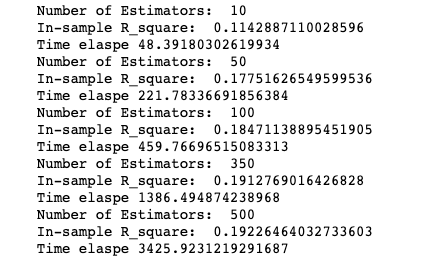

# b)	What is the optimal number of estimators for your forest? 

# c)	Which features contribute the most importance in your model according to scikit-learn function?

# d)	What is feature importance and how is it calculated?  (If you are not sure, refer to the Scikit-Learn.org documentation.)

# Signing
My name is Yu-Ching Liao<br>
My NetID is: 656724372<br>
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.

<center><img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/></center>